# Pandas Practice

This notebook is dedicated to practicing different tasks with pandas. The solutions are available in a solutions notebook, however, you should always try to figure them out yourself first.

It should be noted there may be more than one different way to answer a question or complete an exercise.

Exercises are based off (and directly taken from) the quick introduction to pandas notebook.

Different tasks will be detailed by comments or text.

For further reference and resources, it's advised to check out the [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/).


In [685]:
import pandas as pd

In [686]:
series_colors = pd.Series(["Red", "Green", "Blue"])

In [687]:
series_colors

0      Red
1    Green
2     Blue
dtype: object

In [688]:
series_car_types = pd.Series(["SUV", "Sedan", "Coupé"])


In [689]:
df_cars = pd.DataFrame({"type": series_car_types, "color": series_colors})
df_cars


,type,color
0,SUV,Red
1,Sedan,Green
2,Coupé,Blue


In [690]:
df_sales = pd.read_csv("./data/car-sales.csv")


**Note:** Since you've imported `../data/car-sales.csv` as a DataFrame, we'll now refer to this DataFrame as 'the car sales DataFrame'.


In [691]:
df_cars.to_csv("./data/cars.csv")


In [692]:
df_cars.dtypes


type     object
color    object
dtype: object

In [693]:
df_sales.describe()


,Odometer (KM),Doors
count,9.000000,9.000000
mean,83823.777778,4.111111
std,63366.953380,0.333333
min,11179.000000,4.000000
25%,45698.000000,4.000000
50%,60000.000000,4.000000
75%,99213.000000,4.000000
max,213095.000000,5.000000


In [694]:
df_cars.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    3 non-null      object
 1   color   3 non-null      object
dtypes: object(2)
memory usage: 180.0+ bytes


What does it show you?


In [695]:
from random import randrange

random_numbers = pd.Series([randrange(0, 10) + 1 for i in range(8)])

random_numbers.mean()


5.25

In [696]:
random_numbers.sum()


42

In [697]:
list(df_sales.columns)


['Make', 'Colour', 'Odometer (KM)', 'Doors', 'Price']

In [698]:
len(df_sales)


10

In [699]:
df_sales.head(5)


,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000.00"
1,Honda,Red,87899.0,4.0,"$5,000.00"
2,Toyota,Blue,32549.0,NaN,"$7,000.00"
3,BMW,Black,11179.0,5.0,"$22,000.00"
4,Nissan,White,213095.0,4.0,"$3,500.00"


In [700]:
df_sales.head(7)


,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000.00"
1,Honda,Red,87899.0,4.0,"$5,000.00"
2,Toyota,Blue,32549.0,NaN,"$7,000.00"
3,BMW,Black,11179.0,5.0,"$22,000.00"
4,Nissan,White,213095.0,4.0,"$3,500.00"
5,Toyota,Green,99213.0,4.0,"$4,500.00"
6,Honda,Blue,45698.0,4.0,NaN


In [701]:
df_sales.tail(7)


,Make,Colour,Odometer (KM),Doors,Price
3,BMW,Black,11179.0,5.0,"$22,000.00"
4,Nissan,White,213095.0,4.0,"$3,500.00"
5,Toyota,Green,99213.0,4.0,"$4,500.00"
6,Honda,Blue,45698.0,4.0,NaN
7,Honda,Blue,54738.0,4.0,"$7,000.00"
8,Toyota,White,60000.0,4.0,"$6,250.00"
9,Nissan,White,NaN,4.0,"$9,700.00"


In [702]:
df_sales.loc[2]


Make                Toyota
Colour                Blue
Odometer (KM)      32549.0
Doors                  NaN
Price            $7,000.00
Name: 2, dtype: object

In [703]:
df_sales.iloc[2]


Make                Toyota
Colour                Blue
Odometer (KM)      32549.0
Doors                  NaN
Price            $7,000.00
Name: 2, dtype: object

Notice how they're the same? Why do you think this is?

Check the pandas documentation for [.loc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html) and [.iloc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html). Think about a different situation each could be used for and try them out.


In [704]:
# Select the "Odometer (KM)" column from the car sales DataFrame
df_sales["Odometer (KM)"]


0    150043.0
1     87899.0
2     32549.0
3     11179.0
4    213095.0
5     99213.0
6     45698.0
7     54738.0
8     60000.0
9         NaN
Name: Odometer (KM), dtype: float64

In [705]:
# Find the mean of the "Odometer (KM)" column in the car sales DataFrame
df_sales["Odometer (KM)"].mean()


83823.77777777778

In [706]:
# Select the rows with over 100,000 kilometers on the Odometer
df_sales[df_sales["Odometer (KM)"] > 100000]


,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000.00"
4,Nissan,White,213095.0,4.0,"$3,500.00"


In [707]:
# Create a crosstab of the Make and Doors columns
pd.crosstab(df_sales["Make"], df_sales["Doors"])

Doors,4.0,5.0
Make,,
BMW,0,1
Honda,3,0
Nissan,2,0
Toyota,3,0


In [708]:
# Group columns of the car sales DataFrame by the Make column and find the average
df_sales.groupby(["Make"]).describe()

Odometer (KM)                                                     
               count           mean           std       min        25%   
Make                                                                     
BMW              1.0   11179.000000           NaN   11179.0   11179.00  \
Honda            3.0   62778.333333  22219.728179   45698.0   50218.00   
Nissan           1.0  213095.000000           NaN  213095.0  213095.00   
Toyota           4.0   85451.250000  51015.991325   32549.0   53137.25   

                                     Doors                                     
             50%       75%       max count mean  std  min  25%  50%  75%  max  
Make                                                                           
BMW      11179.0   11179.0   11179.0   1.0  5.0  NaN  5.0  5.0  5.0  5.0  5.0  
Honda    54738.0   71318.5   87899.0   3.0  4.0  0.0  4.0  4.0  4.0  4.0  4.0  
Nissan  213095.0  213095.0  213095.0   2.0  4.0  0.0  4.0  4.0  4.0  4.0  4.0  
Toyota   79606.5  111920.5  150043.0   3.0  4.0  0.0  4.0  4.0  4.0  4.0  4.0

<Axes: >

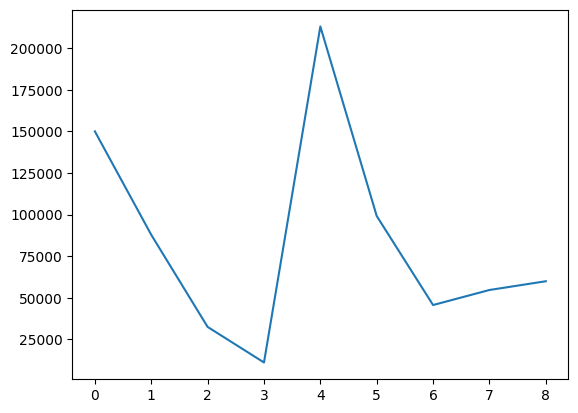

In [709]:
# Import Matplotlib and create a plot of the Odometer column
# Don't forget to use %matplotlib inline
import matplotlib as plt

df_sales["Odometer (KM)"].plot()

<Axes: >

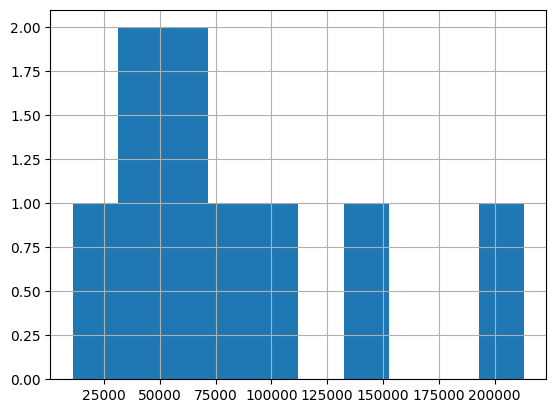

In [710]:
# Create a histogram of the Odometer column using hist()
df_sales["Odometer (KM)"].hist()

In [711]:
# Try to plot the Price column using plot()
# df_sales["Price"].plot()

Why didn't it work? Can you think of a solution?

You might want to search for "how to convert a pandas string column to numbers".

And if you're still stuck, check out this [Stack Overflow question and answer on turning a price column into integers](https://stackoverflow.com/questions/44469313/price-column-object-to-int-in-pandas).

See how you can provide the example code there to the problem here.


In [712]:
# Remove the punctuation from price column
df_sales["Price"] = df_sales["Price"].replace("[$,]", "", regex=True)

In [713]:
df_sales["Price"] = df_sales["Price"].astype(float)

In [714]:
df_sales["Make"] = df_sales["Make"].str.lower()
df_sales

,Make,Colour,Odometer (KM),Doors,Price
0,toyota,White,150043.0,4.0,4000.0
1,honda,Red,87899.0,4.0,5000.0
2,toyota,Blue,32549.0,NaN,7000.0
3,bmw,Black,11179.0,5.0,22000.0
4,nissan,White,213095.0,4.0,3500.0
5,toyota,Green,99213.0,4.0,4500.0
6,honda,Blue,45698.0,4.0,NaN
7,honda,Blue,54738.0,4.0,7000.0
8,toyota,White,60000.0,4.0,6250.0
9,nissan,White,NaN,4.0,9700.0


If you check the car sales DataFrame, you'll notice the Make column hasn't been lowered.

How could you make these changes permanent?

Try it out.


In [715]:
# Make lowering the case of the Make column permanent

In [716]:
# Check the car sales DataFrame

Notice how the Make column stays lowered after reassigning.

Now let's deal with missing data.


Notice the missing values are represented as `NaN` in pandas DataFrames.

Let's try fill them.


In [717]:
# Fill the Odometer column missing values with the mean of the column inplace
df_sales["Odometer (KM)"].fillna(df_sales["Odometer (KM)"].mean(), inplace=True)
df_sales

,Make,Colour,Odometer (KM),Doors,Price
0,toyota,White,150043.000000,4.0,4000.0
1,honda,Red,87899.000000,4.0,5000.0
2,toyota,Blue,32549.000000,NaN,7000.0
3,bmw,Black,11179.000000,5.0,22000.0
4,nissan,White,213095.000000,4.0,3500.0
5,toyota,Green,99213.000000,4.0,4500.0
6,honda,Blue,45698.000000,4.0,NaN
7,honda,Blue,54738.000000,4.0,7000.0
8,toyota,White,60000.000000,4.0,6250.0
9,nissan,White,83823.777778,4.0,9700.0


In [718]:
# Remove the rest of the missing data inplace
df_sales.dropna(inplace=True)
df_sales

,Make,Colour,Odometer (KM),Doors,Price
0,toyota,White,150043.000000,4.0,4000.0
1,honda,Red,87899.000000,4.0,5000.0
3,bmw,Black,11179.000000,5.0,22000.0
4,nissan,White,213095.000000,4.0,3500.0
5,toyota,Green,99213.000000,4.0,4500.0
7,honda,Blue,54738.000000,4.0,7000.0
8,toyota,White,60000.000000,4.0,6250.0
9,nissan,White,83823.777778,4.0,9700.0


We'll now start to add columns to our DataFrame.


In [719]:
# Create a "Seats" column where every row has a value of 5
df_sales["Seats"] = 5

In [720]:
# Create a column called "Engine Size" with random values between 1.3 and 4.5
column_data_engine_size = [randrange(13, 46) / 10 for i in range(len(df_sales))]
df_sales["Engine Size"] = column_data_engine_size
df_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Engine Size
0,toyota,White,150043.000000,4.0,4000.0,5,2.5
1,honda,Red,87899.000000,4.0,5000.0,5,4.5
3,bmw,Black,11179.000000,5.0,22000.0,5,2.8
4,nissan,White,213095.000000,4.0,3500.0,5,1.9
5,toyota,Green,99213.000000,4.0,4500.0,5,2.2
7,honda,Blue,54738.000000,4.0,7000.0,5,2.6
8,toyota,White,60000.000000,4.0,6250.0,5,3.3
9,nissan,White,83823.777778,4.0,9700.0,5,1.9


In [721]:
# Create a column which represents the price of a car per kilometer
df_sales["Price per KM"] = None
df_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Engine Size,Price per KM
0,toyota,White,150043.000000,4.0,4000.0,5,2.5,None
1,honda,Red,87899.000000,4.0,5000.0,5,4.5,None
3,bmw,Black,11179.000000,5.0,22000.0,5,2.8,None
4,nissan,White,213095.000000,4.0,3500.0,5,1.9,None
5,toyota,Green,99213.000000,4.0,4500.0,5,2.2,None
7,honda,Blue,54738.000000,4.0,7000.0,5,2.6,None
8,toyota,White,60000.000000,4.0,6250.0,5,3.3,None
9,nissan,White,83823.777778,4.0,9700.0,5,1.9,None


In [722]:
# Remove the last column you added using .drop()
df_sales.drop(["Price per KM"], axis=1, inplace=True)
df_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Engine Size
0,toyota,White,150043.000000,4.0,4000.0,5,2.5
1,honda,Red,87899.000000,4.0,5000.0,5,4.5
3,bmw,Black,11179.000000,5.0,22000.0,5,2.8
4,nissan,White,213095.000000,4.0,3500.0,5,1.9
5,toyota,Green,99213.000000,4.0,4500.0,5,2.2
7,honda,Blue,54738.000000,4.0,7000.0,5,2.6
8,toyota,White,60000.000000,4.0,6250.0,5,3.3
9,nissan,White,83823.777778,4.0,9700.0,5,1.9


In [723]:
# Shuffle the DataFrame using sample() with the frac parameter set to 1
df_sales_shuffled = df_sales.sample(frac=1)
df_sales_shuffled

,Make,Colour,Odometer (KM),Doors,Price,Seats,Engine Size
7,honda,Blue,54738.000000,4.0,7000.0,5,2.6
0,toyota,White,150043.000000,4.0,4000.0,5,2.5
4,nissan,White,213095.000000,4.0,3500.0,5,1.9
8,toyota,White,60000.000000,4.0,6250.0,5,3.3
1,honda,Red,87899.000000,4.0,5000.0,5,4.5
3,bmw,Black,11179.000000,5.0,22000.0,5,2.8
5,toyota,Green,99213.000000,4.0,4500.0,5,2.2
9,nissan,White,83823.777778,4.0,9700.0,5,1.9


Notice how the index numbers get moved around. The [`sample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) function is a great way to get random samples from your DataFrame. It's also another great way to shuffle the rows by setting `frac=1`.


In [724]:
# Reset the indexes of the shuffled DataFrame
df_sales_shuffled.reset_index(drop=True, inplace=True)
df_sales_shuffled

,Make,Colour,Odometer (KM),Doors,Price,Seats,Engine Size
0,honda,Blue,54738.000000,4.0,7000.0,5,2.6
1,toyota,White,150043.000000,4.0,4000.0,5,2.5
2,nissan,White,213095.000000,4.0,3500.0,5,1.9
3,toyota,White,60000.000000,4.0,6250.0,5,3.3
4,honda,Red,87899.000000,4.0,5000.0,5,4.5
5,bmw,Black,11179.000000,5.0,22000.0,5,2.8
6,toyota,Green,99213.000000,4.0,4500.0,5,2.2
7,nissan,White,83823.777778,4.0,9700.0,5,1.9


Notice the index numbers have been changed to have order (start from 0).


In [725]:
df_sales_shuffled["Odometer (KM)"] = df_sales_shuffled["Odometer (KM)"] / 1.6

In [726]:
# Change the title of the Odometer (KM) to represent miles instead of kilometers
df_sales_shuffled.rename(columns={"Odometer (KM)": "Odometer (Miles)"}, inplace=True)
df_sales_shuffled

,Make,Colour,Odometer (Miles),Doors,Price,Seats,Engine Size
0,honda,Blue,34211.250000,4.0,7000.0,5,2.6
1,toyota,White,93776.875000,4.0,4000.0,5,2.5
2,nissan,White,133184.375000,4.0,3500.0,5,1.9
3,toyota,White,37500.000000,4.0,6250.0,5,3.3
4,honda,Red,54936.875000,4.0,5000.0,5,4.5
5,bmw,Black,6986.875000,5.0,22000.0,5,2.8
6,toyota,Green,62008.125000,4.0,4500.0,5,2.2
7,nissan,White,52389.861111,4.0,9700.0,5,1.9


## Extensions

For more exercises, check out the pandas documentation, particularly the [10-minutes to pandas section](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html).

One great exercise would be to retype out the entire section into a Jupyter Notebook of your own.

Get hands-on with the code and see what it does.

The next place you should check out are the [top questions and answers on Stack Overflow for pandas](https://stackoverflow.com/questions/tagged/pandas?sort=MostVotes&edited=true). Often, these contain some of the most useful and common pandas functions. Be sure to play around with the different filters!

Finally, always remember, the best way to learn something new to is try it. Make mistakes. Ask questions, get things wrong, take note of the things you do most often. And don't worry if you keep making the same mistake, pandas has many ways to do the same thing and is a big library. So it'll likely take a while before you get the hang of it.
